# Fast Fourier Transform - Performing Fourier Transform in O(NlogN) Time Complexity

#### Introduction to Fourier Transform

A fourier transform is a creative way of decomposing complex signals into simpler sinusoidal components. 

Imagine an orchestra playing a complex piece of music - Fourier Transform allows us to identify and analyze the individual contributions of each instrument, providing a clearer understanding of the overall composition.

In essence, a fourier transform is simply a measure of the highest center of mass for a given signal in both the real and complex domains and is mathematically calculated as,

$$
\hat{f}(k) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i k x} dx
$$

This <a href="https://www.youtube.com/watch?v=spUNpyF58BY" target="__blank__">video</a> by 3Blue1Brown provides a detailed explanation of what the above formula actually means.

---

#### Fourier Transform using Discrete Fourier Transform (DFT) vs Fast Fourier Transform (FFT)

Historically, the computation of Fourier transforms in mathematics relied on the Discrete Fourier Transform (DFT). 

$$
\hat{f}(k) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i k x} dx \rightarrow \hat{f}_k = \sum_{0}^{N-1} x_{n} e^{{-2\pi i k n}/N}
$$

Here, $ \hat{f}_k $ is the DFT version of the fourier transform, $ \hat{f}(k) $, $ x_{n} $ is an element of discrete signal and $ N $ is the number of elements in the vector consisting of $ x_{n} $. <strong>Nevertheless, the DFT algorithm posed a limitation—the time complexity for computing the output had a quadratic growth rate, specifically O(n^2).</strong>

A significantly more efficient approach has emerged with the adoption of the Fast Fourier Transform (FFT). The FFT algorithm revolutionizes the computation of Fourier transforms by achieving a time complexity of O(n log n), rendering it notably faster than the traditional DFT method.

This <a href="https://www.youtube.com/watch?v=toj_IoCQE-4" target="__blank__"> video</a> by Steve Brunton is a good learning resource to understand about Fast Fourier Transforms.

---

#### Implementing Fast Fourier Transform

Let's start by importing some common Python libraries,

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Next, defining two sinusoidal signals that we will add together in amplitude to obtain `added_signal`. This is the signal we will decompose down the line using FFT.

In [2]:
f1 = 40  # Frequencey of signal 1
f2 = 60  # Frequency of signal 2
desired_length = 1024  # Number of desired time steps (For FFT, use a desired length equal to the power of 2 or pad your input with 0s)
steps = 1 / desired_length

time_steps = np.arange(start=0, stop=1, step=steps)
signal1 = np.sin(2 * np.pi * f1 * time_steps)
signal2 = np.sin(2 * np.pi * f2 * time_steps)
added_signal = signal1 + signal2

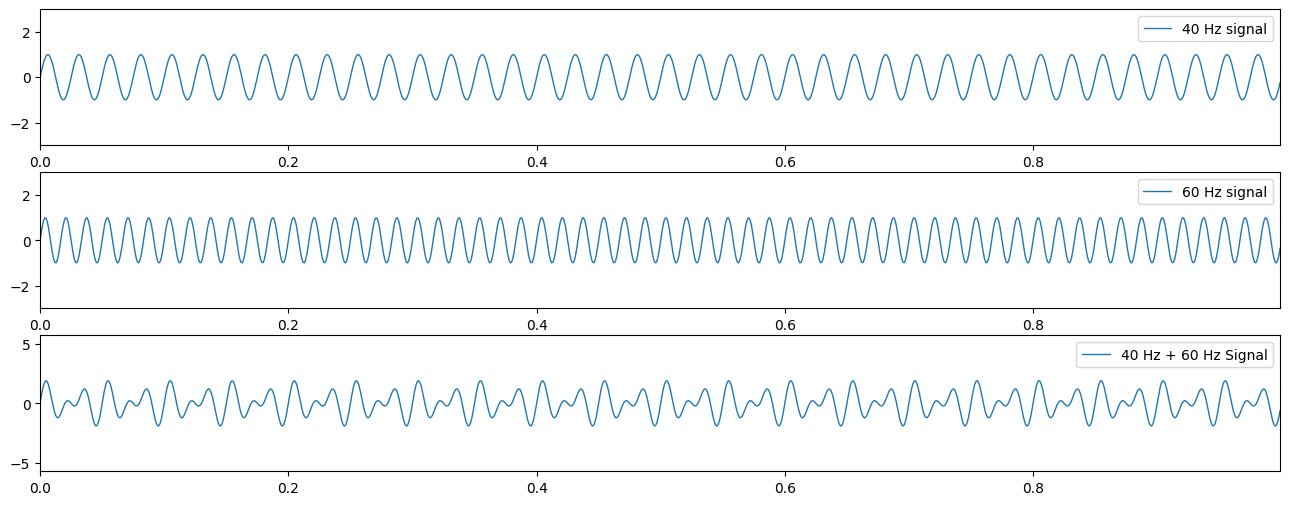

In [3]:
fig, ax = plt.subplots(3, figsize=(16, 6))

ax[0].plot(time_steps, signal1, linewidth=1, label=f"{f1} Hz signal")
ax[0].margins(x=0, y=1)
ax[0].legend()

ax[1].plot(time_steps, signal2, linewidth=1, label=f"{f2} Hz signal")
ax[1].margins(x=0, y=1)
ax[1].legend()

ax[2].plot(
    time_steps,
    added_signal,
    linewidth=1,
    label=f"{f1} Hz + {f2} Hz Signal",
)
ax[2].margins(x=0, y=1)
ax[2].legend()

Next, let's add some noise to the clean signal,

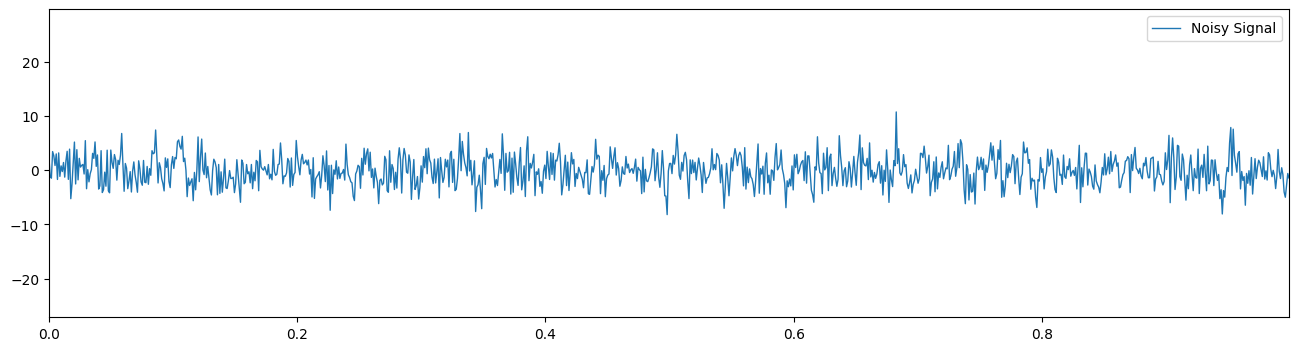

In [4]:
noise = 2.5 * np.random.randn(len(time_steps))
noise_added_signal = added_signal + noise

plt.figure(figsize=(16, 4))
plt.plot(
    time_steps,
    noise_added_signal,
    linewidth=1,
    label="Noisy Signal",
)
plt.margins(x=0, y=1)
plt.legend()
plt.show()

Currently, the x-axis is a measure of time and not frequency, let's fix that by applying fast fourier transform,

In [5]:
def fft(x):
    """
    A recursive implementation of the 1D Cooley-Tukey FFT, the input should have a length of power of 2.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)

        X = np.concatenate(
            [
                X_even + factor[: int(N / 2)] * X_odd,
                X_even + factor[int(N / 2) :] * X_odd,
            ]
        )
        return X

x-axis = 60, y_axis = 559.1202975677346
x-axis = 60, y_axis = 559.1202975677346
x-axis = 40, y_axis = 511.0253434041476
x-axis = 40, y_axis = 511.0253434041475


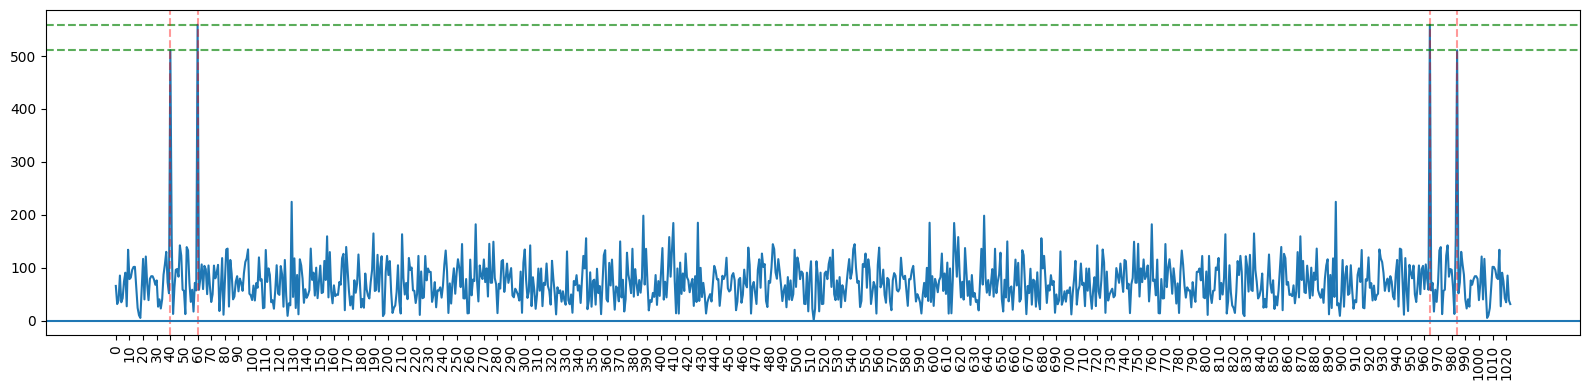

In [6]:
# rfft is a
fourier_signal = np.abs(fft(noise_added_signal))
sorted_indices = np.argsort(fourier_signal)[::-1]
sorted_values = np.sort(fourier_signal)[::-1]

plt.figure(figsize=(16, 4))
plt.plot(fourier_signal)
plt.xticks(np.arange(0, len(fourier_signal), 10), rotation=90)

for i in [0, 1, 2, 3]:
    plt.axvline(sorted_indices[i], color="red", linestyle="--", alpha=0.4)
    plt.axhline(sorted_values[i], color="green", linestyle="--", alpha=0.4)

    if sorted_indices[i] > 100:
        actual_position = desired_length - sorted_indices[i]  # 1024 - sorted_indices[i]
    else:
        actual_position = sorted_indices[i]
    print(f"x-axis = {actual_position}, y_axis = {sorted_values[i]}")

plt.axhline()
plt.tight_layout()

In the chart above, the x-axis points with the highest peaks (denoted by red line) represents the frequency of the original two sinusoidal waves (40 and 60 Hz).

---

#### References:

1. Fast Fourier Transform (FFT) Algorithm Implementation In Python [<a href="https://medium.com/0xcode/fast-fourier-transform-fft-algorithm-implementation-in-python-b592099bdb27" target = "__blank__">Link</a>]
2. Fourier Transform, the Practical Python Implementation [<a href="https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a" target = "__blank__">Link</a>]
3. The Fast Fourier Transform (FFT) [<a href="https://medium.com/swlh/the-fast-fourier-transform-fft-5e96cf637c38" target = "__blank__">Link</a>]

